In [4]:
import numpy as np
import pandas as pd
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *


In [6]:
df_stocks = pd.read_pickle('/home/shan/Project_Mtech/stock_market_pre/Data/Pickled_data.pkl')
print(df_stocks.info())
df_stocks.head()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3653 entries, 2007-01-01 to 2016-12-31
Freq: D
Data columns (total 3 columns):
close        3653 non-null float64
adj close    3653 non-null float64
articles     3653 non-null object
dtypes: float64(2), object(1)
memory usage: 114.2+ KB
None


,close,adj close,articles
2007-01-01,12469.971875,12469.971875,. What Sticks from '06. Somalia Orders Islamis...
2007-01-02,12472.245703,12472.245703,. Heart Health: Vitamin Does Not Prevent Death...
2007-01-03,12474.519531,12474.519531,. Google Answer to Filling Jobs Is an Algorith...
2007-01-04,12480.690430,12480.690430,. Helping Make the Shift From Combat to Commer...
2007-01-05,12398.009766,12398.009766,. Rise in Ethanol Raises Concerns About Corn a...


In [8]:
df_stocks['prices'] = df_stocks['adj close'].apply(np.int64)
print(df_stocks.info())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3653 entries, 2007-01-01 to 2016-12-31
Freq: D
Data columns (total 4 columns):
close        3653 non-null float64
adj close    3653 non-null float64
articles     3653 non-null object
prices       3653 non-null int64
dtypes: float64(2), int64(1), object(1)
memory usage: 142.7+ KB
None


In [9]:
# selecting the prices and articles
df_stocks = df_stocks[['prices', 'articles']]
df_stocks['articles'] = df_stocks['articles'].map(lambda x: x.lstrip('.-'))
#print(df_stocks.head())


In [21]:
df = df_stocks[['prices']].copy()
#print(df.head())
df["compound"] = ''
df["neg"] = ''
df["neu"] = ''
df["pos"] = ''

df_stocks.articles.dtype
T_df_stocks=df_stocks.T
T_df_stocks
df

,prices,compound,neg,neu,pos
2007-01-01,12469,,,,
2007-01-02,12472,,,,
2007-01-03,12474,,,,
2007-01-04,12480,,,,
2007-01-05,12398,,,,
2007-01-06,12406,,,,
2007-01-07,12414,,,,
2007-01-08,12423,,,,
2007-01-09,12416,,,,
2007-01-10,12442,,,,


In [26]:
#Now starts score prediction for given sentence.
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#import nltk
#nltk.download('vader_lexicon')
import unicodedata
saf = SentimentIntensityAnalyzer()   #df_stocks.T provides the transpose of data
T_df_stocks=df_stocks.T
#print(T_df_stocks.head())

for date, row in df_stocks.T.iteritems():
    try:
        sentence = unicodedata.normalize('NFKD', df_stocks.loc[date, 'articles']).encode('ascii','ignore')
        #print(sentence)
        ss = saf.polarity_scores(sentence)
        df.set_value(date, 'compound', ss['compound'])
        df.set_value(date, 'neg', ss['neg'])
        df.set_value(date, 'neu', ss['neu'])
        df.set_value(date, 'pos', ss['pos'])
    except TypeError:
        #print (df_stocks.loc[date, 'articles'].head())
        date


/home/shan/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app
/home/shan/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:16: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  app.launch_new_instance()
/home/shan/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:17: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/home/shan/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:18: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


In [29]:
df.head()


,prices,compound,neg,neu,pos
2007-01-01,12469,-0.9814,0.159,0.749,0.093
2007-01-02,12472,-0.8335,0.116,0.785,0.099
2007-01-03,12474,-0.9993,0.198,0.734,0.067
2007-01-04,12480,-0.9982,0.131,0.806,0.062
2007-01-05,12398,-0.9901,0.124,0.794,0.082


In [30]:
#sentence = 'paris shootout police officer suspected guman dead'
#sentence ='ohh no icici deal '
#from nltk.sentiment.vader import SentimentIntensityAnalyzer
#import unicodedata
#sid = SentimentIntensityAnalyzer()
#ss = sid.polarity_scores(sentence)
#ss
df.head()

,prices,compound,neg,neu,pos
2007-01-01,12469,-0.9814,0.159,0.749,0.093
2007-01-02,12472,-0.8335,0.116,0.785,0.099
2007-01-03,12474,-0.9993,0.198,0.734,0.067
2007-01-04,12480,-0.9982,0.131,0.806,0.062
2007-01-05,12398,-0.9901,0.124,0.794,0.082


In [31]:
train_start_date = '2007-01-01'
train_end_date = '2014-12-31'
test_start_date = '2015-01-01'
test_end_date = '2016-12-31'
train = df.loc[train_start_date : train_end_date]
test = df.loc[test_start_date:test_end_date]
print(train.head())
print(test.head())

            prices compound    neg    neu    pos
2007-01-01   12469  -0.9814  0.159  0.749  0.093
2007-01-02   12472  -0.8335  0.116  0.785  0.099
2007-01-03   12474  -0.9993  0.198  0.734  0.067
2007-01-04   12480  -0.9982  0.131  0.806  0.062
2007-01-05   12398  -0.9901  0.124  0.794  0.082
            prices compound    neg    neu    pos
2015-01-01   17828  -0.8744  0.134  0.737  0.129
2015-01-02   17832  -0.9667  0.145   0.76  0.095
2015-01-03   17722  -0.9621  0.125  0.788  0.088
2015-01-04   17612  -0.9971   0.22  0.716  0.064
2015-01-05   17501  -0.9905  0.156  0.767  0.077


In [32]:
sentiment_score_list = []
for date, row in train.T.iteritems():
    #sentiment_score = np.asarray([df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])
    sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
    sentiment_score_list.append(sentiment_score)
numpy_df_train = np.asarray(sentiment_score_list)
numpy_df_train

array([[0.159, 0.093],
       [0.116, 0.099],
       [0.198, 0.067],
       ...,
       [0.173, 0.082],
       [0.16 , 0.14 ],
       [0.205, 0.134]])

In [33]:
sentiment_score_list = []
for date, row in test.T.iteritems():
    #sentiment_score = np.asarray([df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])
    sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
    sentiment_score_list.append(sentiment_score)
numpy_df_test = np.asarray(sentiment_score_list)
numpy_df_test

array([[0.134, 0.129],
       [0.145, 0.095],
       [0.125, 0.088],
       ...,
       [0.138, 0.103],
       [0.162, 0.108],
       [0.181, 0.16 ]])

In [34]:
y_train = pd.DataFrame(train['prices'])
y_test = pd.DataFrame(test['prices'])
print(y_train)
print(y_test)

            prices
2007-01-01   12469
2007-01-02   12472
2007-01-03   12474
2007-01-04   12480
2007-01-05   12398
2007-01-06   12406
2007-01-07   12414
2007-01-08   12423
2007-01-09   12416
2007-01-10   12442
2007-01-11   12514
2007-01-12   12556
2007-01-13   12562
2007-01-14   12569
2007-01-15   12575
2007-01-16   12582
2007-01-17   12577
2007-01-18   12567
2007-01-19   12565
2007-01-20   12536
2007-01-21   12506
2007-01-22   12477
2007-01-23   12533
2007-01-24   12621
2007-01-25   12502
2007-01-26   12487
2007-01-27   12488
2007-01-28   12489
2007-01-29   12490
2007-01-30   12523
...            ...
2014-12-02   17879
2014-12-03   17912
2014-12-04   17900
2014-12-05   17958
2014-12-06   17923
2014-12-07   17887
2014-12-08   17852
2014-12-09   17801
2014-12-10   17533
2014-12-11   17596
2014-12-12   17280
2014-12-13   17247
2014-12-14   17214
2014-12-15   17180
2014-12-16   17068
2014-12-17   17356
2014-12-18   17778
2014-12-19   17804
2014-12-20   17856
2014-12-21   17907
2014-12-22  

In [35]:

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report,confusion_matrix

rf = RandomForestRegressor()
rf.fit(numpy_df_train, y_train)
print (rf.feature_importances_)

/home/shan/anaconda3/lib/python2.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/shan/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


[0.52961734 0.47038266]


In [36]:
from treeinterpreter import treeinterpreter as ti
prediction, bias, contributions = ti.predict(rf, numpy_df_test)


In [43]:
prediction

array([11627.6       ,  9970.3       , 16015.04      , 13489.6       ,
       11829.8       , 12114.5       , 12682.9       , 14669.5       ,
       13898.        , 10399.2       , 12120.8       , 11282.425     ,
       14965.33333333, 11966.1       , 12346.67      , 12621.6       ,
       12980.025     , 12430.93333333, 15308.6       , 15758.7       ,
       11503.        , 13549.65833333, 13666.84      , 13382.8       ,
       14542.525     , 13630.06666667, 12299.4       , 12619.73333333,
       12361.775     , 14705.04583333, 14753.7       , 12980.1       ,
        9979.6       , 11086.58666667, 11063.2       , 12392.5       ,
       11768.73833333, 13902.9       , 13961.3       , 12796.81666667,
       11591.25166667, 13289.4       , 13737.98      , 11793.65      ,
       15086.3       , 13960.5       , 13325.5       ,  9858.8       ,
       11417.18      , 10276.55      , 16008.325     , 15960.5       ,
       12077.3       , 11945.1       , 13361.71666667, 10851.595     ,
      

In [40]:
contributions

array([[ -511.2246378 ,  -446.65383585],
       [-1696.13273884,  -919.04573481],
       [ 1091.66885985,  2337.8926665 ],
       ...,
       [ -710.01856561,  -660.90990804],
       [ 1427.45795894,   161.66356741],
       [ -168.75562421,   -69.12284944]])

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline

idx = pd.date_range(test_start_date, test_end_date)
predictions_df = pd.DataFrame(data=prediction[0:], index = idx, columns=['prices'])

predictions_df
price_comp=pd.merge(predictions_df,y_test,how='inner',on=idx)
price_comp

,key_0,prices_x,prices_y
0,2015-01-01,11627.600000,17828
1,2015-01-02,9970.300000,17832
2,2015-01-03,16015.040000,17722
3,2015-01-04,13489.600000,17612
4,2015-01-05,11829.800000,17501
5,2015-01-06,12114.500000,17371
6,2015-01-07,12682.900000,17584
7,2015-01-08,14669.500000,17907
8,2015-01-09,13898.000000,17737
9,2015-01-10,10399.200000,17705


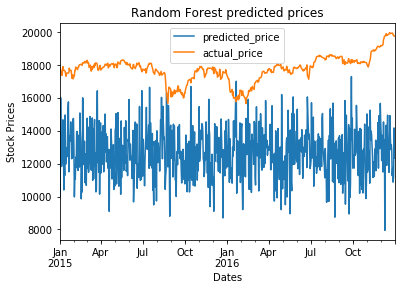

In [52]:
''''predictions_plot = predictions_df.plot()

fig = y_test.plot(ax = predictions_plot).get_figure()
fig.savefig("/home/shan/Project_Mtech/stock_market_pre/Data/random_forest_without_smoothing.png")'''

ax = predictions_df.rename(columns={"prices": "predicted_price"}).plot(title='Random Forest predicted prices')
ax.set_xlabel("Dates")
ax.set_ylabel("Stock Prices")
fig = y_test.rename(columns={"prices": "actual_price"}).plot(ax = ax).get_figure()
fig.savefig("/home/shan/Project_Mtech/stock_market_pre/Data/random_forest_without_smoothing.png")

In [51]:
test

,prices,compound,neg,neu,pos
2015-01-01,17828,-0.8744,0.134,0.737,0.129
2015-01-02,17832,-0.9667,0.145,0.76,0.095
2015-01-03,17722,-0.9621,0.125,0.788,0.088
2015-01-04,17612,-0.9971,0.22,0.716,0.064
2015-01-05,17501,-0.9905,0.156,0.767,0.077
2015-01-06,17371,-0.9985,0.171,0.752,0.077
2015-01-07,17584,-0.9963,0.148,0.785,0.068
2015-01-08,17907,-0.9993,0.191,0.729,0.08
2015-01-09,17737,-0.9979,0.178,0.733,0.089
2015-01-10,17705,-0.9979,0.198,0.751,0.051
